In [1]:
from navground import core, sim
import numpy as np

In [2]:
world = sim.World()

# place some agents at random position

for _ in range(3):
    agent = sim.Agent(radius=0.5)
    agent.position = np.random.rand(2) * 4 - 2
    agent.orientation = np.random.rand() * np.pi * 2
    world.add_agent(agent)

world.add_obstacle(core.Disc((3, 3), 0.75))
world.add_obstacle(core.Disc((-3, -3), 0.55))

ps = [(5 * i, 5 * j) for i, j in ((1, -1), (-1, -1), (-1, 1), (1, 1), (1, -1))]
for p1, p2 in zip(ps, ps[1:]):
    world.add_wall(core.LineSegment(p1, p2))

world.space_agents_apart(minimal_distance = 1.0)

agent = world.agents[0]
agent.pose

Pose2((-2.151959, -1.065667), 2.204455)

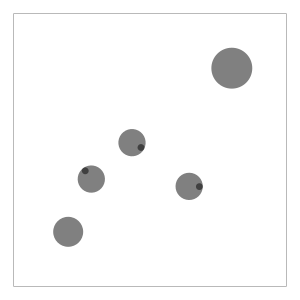

In [3]:
from IPython.display import SVG
from matplotlib import pyplot as plt
from navground.sim.ui import to_svg

SVG(to_svg.svg_for_world(world, width=300))

# Geometric

In [4]:
state = core.GeometricState()

In [5]:
estimation = sim.state_estimations.BoundedStateEstimation(
    range=10, update_static_obstacles=True)

In [6]:
estimation.update(agent, world, state)

In [7]:
state.neighbors

[Neighbor(Disc((1.435848, -1.333832), 0.500000), (0.000000, 0.000000), 0),
 Neighbor(Disc((-0.659905, 0.269166), 0.500000), (0.000000, 0.000000), 0)]

In [8]:
state.static_obstacles

[Disc((-3.000000, -3.000000), 0.550000), Disc((3.000000, 3.000000), 0.750000)]

In [9]:
# not a bug ... does not dynamically update static obstacles
# but I should add a param to specify this
state.line_obstacles

[]

# Sensing

## Lidar

In [10]:
state = core.SensingState()

In [11]:
estimation = sim.state_estimations.LidarStateEstimation(
    range=10, resolution=100)

In [12]:
estimation.update(agent, world, state)

In [13]:
ranges = state.buffers['range'].data
angles = np.linspace(estimation.start_angle, 
                     estimation.start_angle + estimation.field_of_view, 
                     estimation.resolution)

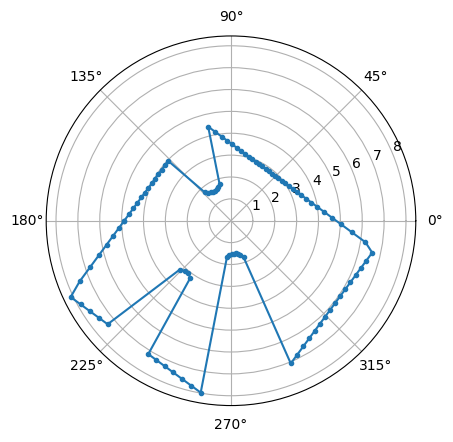

In [14]:
plt.polar(angles, ranges, '.-')

## Discs

In [15]:
state = core.SensingState()

In [20]:
estimation = sim.state_estimations.DiscsStateEstimation(
    range=10, number=2, max_radius=10)

In [21]:
estimation.update(agent, world, state)

In [22]:
dict(state.buffers)

{'position': Buffer(description=BufferDescription(shape=(2, 2), type=dtype('float64'), low=-10.0, high=10.0, categorical=False), data=array([[ 0.1442404 , -1.49505809],
        [-0.78152005,  1.35250636]])),
 'radius': Buffer(description=BufferDescription(shape=(2,), type=dtype('float64'), low=0.0, high=10.0, categorical=False), data=array([0.5 , 0.55])),
 'valid': Buffer(description=BufferDescription(shape=(2,), type=dtype('uint8'), low=0.0, high=1.0, categorical=False), data=array([1, 1], dtype=uint8))}

(-10.0, 10.0)

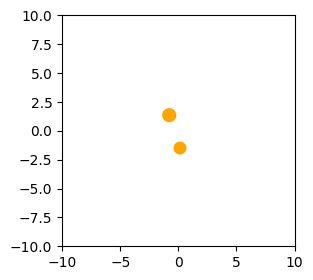

In [23]:
fig, ax = plt.subplots(figsize=(3, 3)) 
# ax.add_patch(plt.Circle((0, 0), agent.radius, color='black'))
for xy, r in zip(state.buffers['position'].data, 
                 state.buffers['radius'].data):
    ax.add_patch(plt.Circle(xy, r, color='orange'))
plt.xlim(-estimation.range, estimation.range)
plt.ylim(-estimation.range, estimation.range)
# plt.axis('off');